# Future Sales Prediction

The dataset is about the advertising cost incurred by the business on various advertising platforms. Below is the description of all th columns in the dataset:

1. TV: Advertising cost spent in dollars for advertising on TV
2. Radio: Advertising cost spent in dollars for advertising on Radio
3. Newspaper: Advertising cost spent in dollars for advertising on  Newspaper;
4. Sales: Number of units sold


### Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Get the data

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")


KeyboardInterrupt



In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# Descriptive statistics
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Let's visualize the dataset

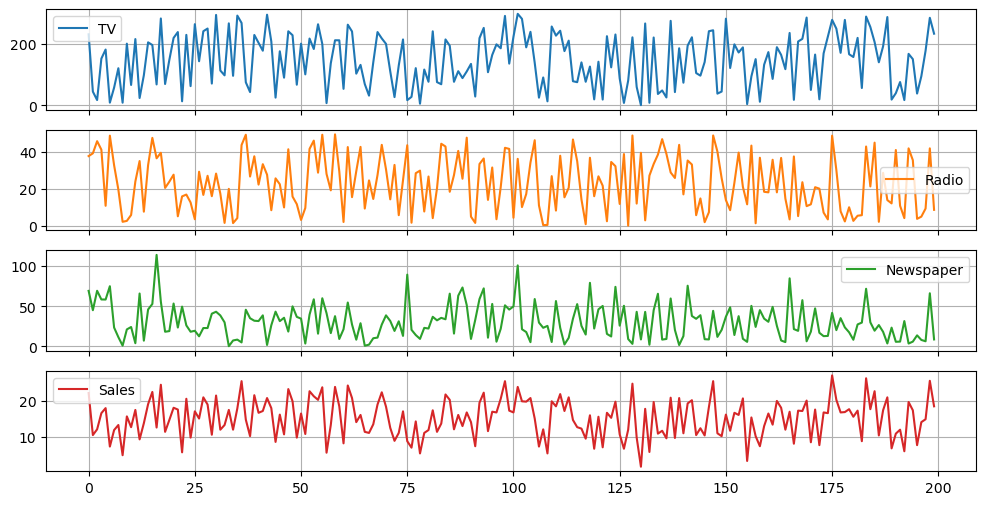

In [23]:
data.plot(subplots=True, grid=True, figsize=(12,6))
plt.show()

### Lets Visualize the relationship between the amount spent  and units sold

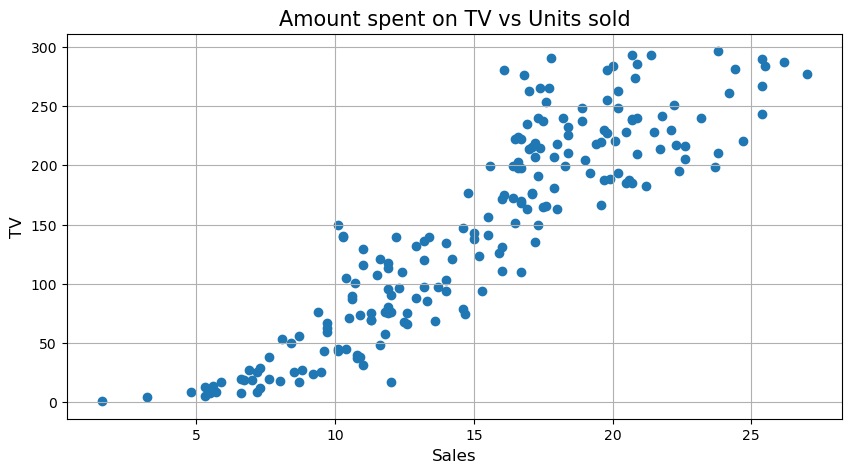

In [16]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.scatter(data['Sales'], data['TV'])
plt.xlabel('Sales',size=12)
plt.ylabel('TV', size=12)
plt.title('Amount spent on TV vs Units sold',size=15)
plt.grid()
plt.show()

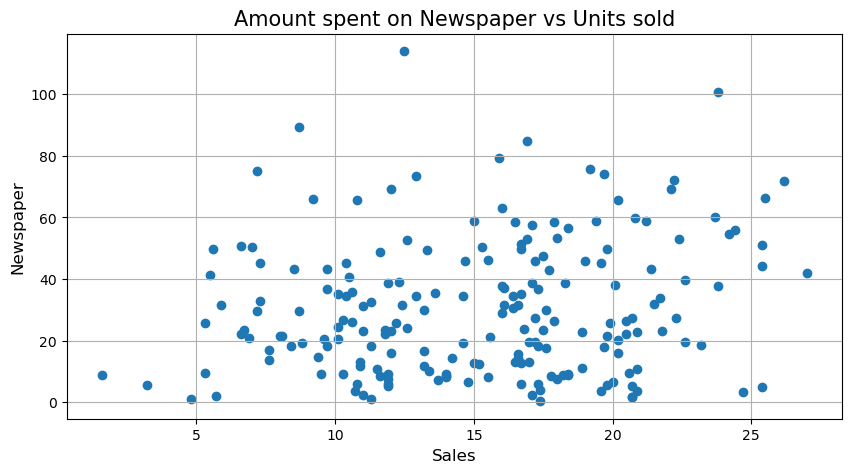

In [18]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.scatter(data['Sales'], data['Newspaper'])
plt.xlabel('Sales',size=12)
plt.ylabel('Newspaper', size=12)
plt.title('Amount spent on Newspaper vs Units sold',size=15)
plt.grid()
plt.show()

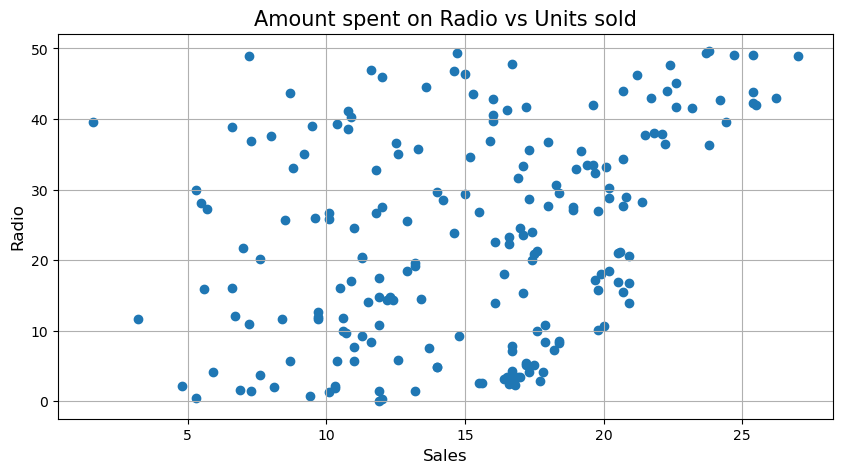

In [19]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.scatter(data['Sales'], data['Radio'])
plt.xlabel('Sales',size=12)
plt.ylabel('Radio', size=12)
plt.title('Amount spent on Radio vs Units sold',size=15)
plt.grid()
plt.show()

Out of all the amount spent on advertising on various platforms, I can see that the amount spent on advertising the product on TV results in more sales of the product

### Lets check the correlation of all the columns with the sales column:

In [20]:
correlation = data.corr()['Sales']

In [21]:
correlation

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

### Future Sales Prediction Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
# X = feature
# Y = target

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [26]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [31]:

Y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

### Train Test Split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

### Train the model

In [34]:
linReg = LinearRegression(fit_intercept=True)

In [35]:
linReg.fit(x_train,y_train)

LinearRegression()

### Test the model

In [36]:
y_pred = linReg.predict(x_test)

In [37]:
print(linReg.score(x_test,y_test))

0.9115647723992757


The model has an accuracy of 91%

In [54]:
y_test.head()


95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [57]:
y_pred[:5]

array([17.04041233, 20.39964377, 23.74740099,  9.25653209, 21.67525948])

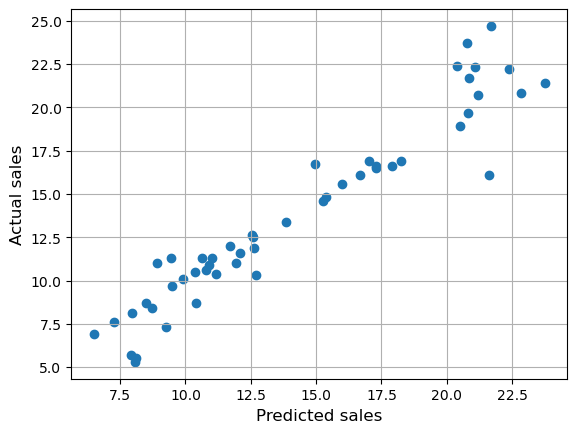

In [49]:
plt.style.use('default')
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted sales', size=12)
plt.ylabel('Actual sales', size=12)
plt.grid()

In [58]:
linReg.intercept_,linReg.coef_

(4.741842244124564, array([0.05461383, 0.09975946, 0.00430495]))

### Prediction

In [51]:
#features = [TV, Radio, Newspaper]
features = np.array([[230.1,37.8,69.2]])
print(linReg.predict(features))

[21.37729583]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
